### *Simulating Random Walks*

Author: Roman Schulze <br>
Date: 11-12-2020 

Overview:
<ul>
<li> The first step consists in creating two functions: </li>
<ul>
<li> function to create a series of random walks</li> 
<li> function to create a line chart </li>
</ul>
<li> The second step will use object oriented programming to create a class 'RandomWalk' containg a fit and a plot method:</li>
<ul>
<li> the fit method returns a dataframe containing 'instances' number of random walks </li>
<li> the plot method visualizes the Random Walks in a 2D graph </li>
</ul>
<li>The third step will perform two examples.</li>
</ul>

###### *Import libraries*

In [145]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use("seaborn-white")
%matplotlib inline

###### *1. Functions to create and visualize random walks*

In [146]:
# 1. function to derive random walks
def random_walk(instances, start, n_obs):
    """
        Takes in the parameters instances, start, n_obs.
        Returns a dataframe containing 'instances' random walk(s).
        param instances: number of random walks.
        param start: starting value for each random walk.
        param n_obs: total number of observations per random walk.
    """
    dic = {}
    # create a random walk for each instance
    for instance in range(instances):
        # pass starting value to the local variable y
        y = start
        # empty list to store resutls
        sequence = []
        # add starting value to sequence as first entry
        sequence.append(y)
        # create a sequence of white noise containing n_obs observations
        innovations = np.random.normal(0, 1, n_obs)
        # create a random walk and append it´s values to sequence
        for innovation in innovations:
            # model equation
            y = y + innovation
            # append sequence by y
            sequence.append(y)
        # append the dictionary by random walk
        dic[f"random_walk_{instance + 1}"] = sequence 
        # create a dataframe taking dic as input
        df = pd.DataFrame(dic)
    # return dataframe
    return df


In [147]:
# 2. function to plot random walk
def plot_random_walks(df, **kwargs):
    """
        Takes in a dataframe created by the fit method.
        Returns a line plot.
        param df: Dataframe of size (n_obs * instances).
        param **kwargs: specify additional arguments to the plot
    """
    ax = df.plot(**kwargs)
    # add horizontal grid
    ax.grid(axis="y", linestyle="-", alpha=0.7)
    # define xlabel
    ax.set_xlabel("Index", fontsize=14)
    # define ylabel
    ax.set_ylabel("Value", fontsize=14)
    # set title
    ax.set_title("Random Walk", fontsize=16)
    # Adjustment of axis, title, spines and ticks colors
    ax.spines["bottom"].set_color("black")
    ax.spines["top"].set_color("black")
    ax.spines["left"].set_color("black")
    ax.spines["right"].set_color("black")
    ax.xaxis.label.set_color("black")
    ax.yaxis.label.set_color("black")
    ax.title.set_color("black")
    ax.tick_params(axis="x", colors="black")
    ax.tick_params(axis="y", colors="black")
    # show plot
    plt.show()

###### *2. Use OOP for implementation*

In [148]:
class RandomWalk:
    # choose default values for parameters
    def __init__(self, start=0, n_obs=100, instances=1):
        self.start = start
        self.n_obs = n_obs
        self.instances = instances

    def __str__(self):
        return f"A series of {self.instances} random walk(s)." \
            f" Each having a starting value of {self.start}, containing {self.n_obs} observations."

    def fit(self):
        self.sequence = random_walk(start=self.start, n_obs=self.n_obs, instances=self.instances)
        return self.sequence
    
    def plot(self, **kwargs):
        try:
            plot_random_walks(self.sequence, **kwargs)
        except AttributeError:
            print("Make sure to apply the 'fit' method on your Random Walk" \
             " instance first before calling the plot method.")

###### *3. Examples*

In [149]:
# set seed for reproducibility
np.random.seed(3)

In [150]:
# Create an instance of class Random Walk 
# starting value for each of the 2 random walks is equal to 100
# each random walk contains 100 observations
rw = RandomWalk(100, 100, 2)

# receive realizations using the fit method
df = rw.fit()

# print first five rows of the dataframe
print(df.head())

   random_walk_1  random_walk_2
0     100.000000     100.000000
1     101.788628     100.874286
2     102.225138      99.580749
3     102.321636      99.501008
4     100.458143     100.065494


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


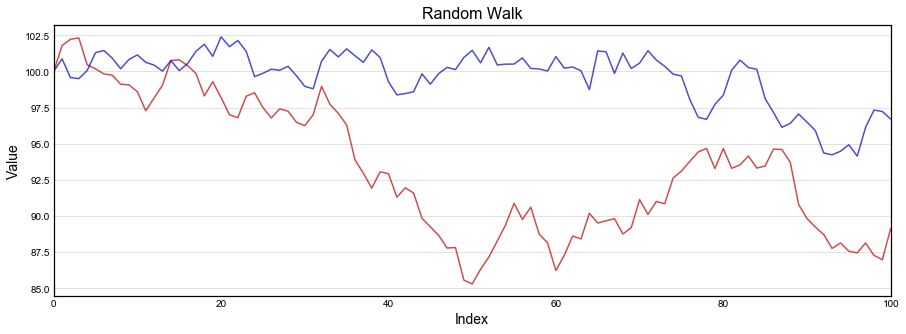

In [151]:
# use the plot method to visualize the random walk
rw.plot(alpha=0.7, legend=False, figsize=(15, 5), colors = ['#BB0000', '#0000BB'])

In [152]:
# Create an instance of class Random Walk 
# starting value for each of the 50 random walks is equal to 100
# each random walk contains 100 observations
rw = RandomWalk(100, 100, 50)

# receive realizations using the fit method
df = rw.fit()

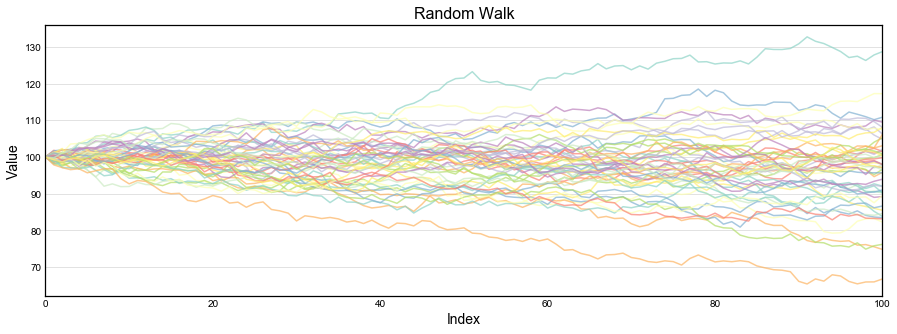

In [153]:
# use the plot method to visualize the random walk
rw.plot(alpha=0.7, legend=False, figsize=(15, 5))